In [14]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
from numpy import random

# ===== example ============
#mu, sigma = 12, 3.0 # mean and standard deviation
#s = np.random.normal(mu, sigma, 1000)

#count, bins, ignored = plt.hist(s, 100, density=True)
#plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
#               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
#         linewidth=2, color='r')
#plt.show()
#A = ['pooh', 'rabbit', 'piglet', 'Christopher']
#print(np.random.choice(A, 5, p=[0.5, 0.1, 0.1, 0.3]))
# ==========================
class MarkovChain:
    def __init__(self):
        
        self.state = {
                        0 : "Cleary",
                        1 : "Cloudy",
                        2 : "Rainy"
                     }
        self.A = np.array( [
                [0.50, 0.30, 0.20], 
                [0.10, 0.45, 0.45], 
                [0.45, 0.10, 0.45]
                        ] )
    def Random_Walk(self):
        n = 15
        start_state = 0
        curr_state = start_state
        print(state[curr_state], "--->", end=" ")
        while n-1:
            curr_state = np.random.choice([0, 1, 2], p=A[curr_state])
            print(state[curr_state], "--->", end=" ")
            n-=1
        print("stop")
    def Monte_Carlo(self):
        # Approach -1 : Monte Carlo 
        steps = 10**6
        start_state = 0
        curr_state = start_state
        pi = np.array([0, 0, 0])
        pi[start_state] = 1
        i = 0
        while i<steps:
            curr_state = np.random.choice([0,1,2], p=A[curr_state])
            pi[curr_state]+=1
            i +=1
        print("π = ", pi/steps)
        return pi/steps
    def Matrix_Multiplication(self):
        # Approach - 2 :  Repeated Matrix Multiplication
        steps = 10**3
        A_n = A
        i=0
        while i<steps:
            A_n =  np.matmul(A_n, A)
            i+=1

        print("A^n = \n", A_n, "\n")
        print("π = ", A_n[0])
        return A_n[0]
    def Eigen_Vectors(self):
        # Approach - 3 : Finding Left Eigen Vectors
        values, left = scipy.linalg.eig(A, right = False, left = True)
        # print("left eigen vectors = \n", left, "\n")
        # print("eigen values = \n", values)
        pi = left[:,0]
        pi_normalized = [(x/np.sum(pi)).real for x in pi]
        return pi_normalized

    def find_prob(self,seq, A, pi):
        start_state = seq[0]
        prob = pi[start_state]
        prev_state, curr_state = start_state, start_state
        for i in range(1, len(seq)):
            curr_state = seq[i]
            prob *= A[prev_state][curr_state]
            prev_state = curr_state
        return prob

    
np.random.seed(0)
n_frmr, n_day, sigma_day = 10, 30, 5
# frmr = random.exponential(scale=n_day/2, size=(n_frmr, 30))
frmr = np.random.normal(n_day/2, sigma_day, n_frmr)
#count, bins, ignored = plt.hist(frmr, 100, density=True)
#plt.show()
v_frmr, v_sigma = 12, 3.0 # mean and standard deviation
vl_frmr = np.random.normal(v_frmr, v_sigma, n_frmr)
#count, bins, ignored = plt.hist(vl_frmr, 100, density=True)
#plt.show()

m_frmr, m_sigma = 25, 2.0 # mean and standard deviation
mi_frmr = np.random.normal(m_frmr, m_sigma, n_frmr)

frmr_day_vl = [[0.0 for col in range(n_day)] for row in range(n_frmr)]
frmr_day_mi = [[0.0 for col in range(n_day)] for row in range(n_frmr)]

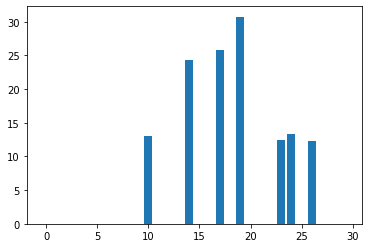

In [35]:
#assign rice volume for each farmer in day of month
for row in range(n_frmr):
    frmr_day_vl[row][int(frmr[row])] = round(vl_frmr[row],2)
    frmr_day_mi[row][int(frmr[row])] = round(mi_frmr[row],2)

#print(frmr_day_mi)
#print(frmr_day_vl)
arr_frmr_day_vl = np.array(frmr_day_vl)
sum_alldays = arr_frmr_day_vl.sum(axis=0)
#print(sum_alldays)

#print(np.arange(sum_alldays.size))
plt.bar(np.arange(sum_alldays.size), sum_alldays)
plt.show()
#plt.xticks(np.range(sum_alldays), np.range(sum_alldays))

In [16]:
A = np.array( [
                [0.50, 0.30, 0.20], 
                [0.10, 0.45, 0.45], 
                [0.45, 0.10, 0.45]
                        ] )
m  = MarkovChain()
pi_normalized = m.Eigen_Vectors()
prob = m.find_prob([1, 2, 2, 0], A, pi_normalized)
print(prob)
#print(m.find_prob([1, 2, 2, 0], A, pi_normalized))

0.024520909090909072
